<a href="https://colab.research.google.com/github/C0RD3LL/Portfolio/blob/main/PhyloseqSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.1                         
year           2021                        
month          08                          
day            10                          
svn rev        80725                       
language       R                           
version.string R version 4.1.1 (2021-08-10)
nickname       Kick Things                 

In [6]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("phyloseq")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'phyloseq'

also installing the dependencies ‘rhdf5filters’, ‘rhdf5’, ‘biomformat’


Old packages: 'broom', 'cpp11', 'gert', 'glue', 'openssl', 'sessioninfo',
  'tibble', 'tinytex', 'uuid', 'xfun', 'nlme'



In [8]:
#Load required Libraries:
library("phyloseq")
library("ggplot2")
library("dplyr")

#Import the data:
otu_mat<- read.table("https://raw.githubusercontent.com/pine-bio-support/Metagenomics-3/master/Acne_Amplicon_Abundance_table.txt", header = TRUE, sep = "\t")
tax_mat<- read.table("https://raw.githubusercontent.com/pine-bio-support/Metagenomics-3/master/Acne_Taxonomy_table.txt", header = TRUE, sep = "\t")
samples_df <- read.table("https://raw.githubusercontent.com/pine-bio-support/Metagenomics-3/master/Acne_SupplementaryTable.txt", header = TRUE, sep = "\t")


In [9]:
#Define Row Names for each type of data
row.names(otu_mat) <- otu_mat$OTUs
#Remove the column which is  already used as row from the data
otu_mat <- otu_mat %>% select (-OTUs)
row.names(tax_mat) <- tax_mat$class
tax_mat <- tax_mat %>% select (-class)
row.names(samples_df) <- samples_df$Run
samples_df <- samples_df %>% select (-Run)
sampletype <- unique(row.names(samples_df))
#Transform into matrix
otu_mat <- as.matrix(otu_mat)
tax_mat <- as.matrix(tax_mat)
#Transform matrix data as input for Phyloseq
OTU = otu_table(otu_mat, taxa_are_rows = TRUE)
TAX = tax_table(tax_mat)
samples = sample_data(samples_df)
acne <- phyloseq(OTU, TAX, samples)


In [12]:
#Visualization: bar chart
p=plot_bar(acne, fill = "Phylum")
plot1<- p+ theme(legend.key.size = unit(0.3, "cm"), legend.text = element_text( color="Black", size=7.5), axis.text.x = element_text( color="Black", size=7.5))

In [19]:
#NMDS - non-metric multidimensional scaling ordination
suppressWarnings(acne.ord <- ordinate(acne, "NMDS", "bray"))
sample_variables(acne)




Square root transformation
Wisconsin double standardization
Run 0 stress 0.2040416 
Run 1 stress 0.2025202 
... New best solution
... Procrustes: rmse 0.09794015  max resid 0.3110836 
Run 2 stress 0.2085576 
Run 3 stress 0.2004385 
... New best solution
... Procrustes: rmse 0.03656006  max resid 0.1107966 
Run 4 stress 0.201044 
Run 5 stress 0.2040415 
Run 6 stress 0.2050262 
Run 7 stress 0.2020709 
Run 8 stress 0.2027335 
Run 9 stress 0.2042243 
Run 10 stress 0.2097723 
Run 11 stress 0.202398 
Run 12 stress 0.2086669 
Run 13 stress 0.2014781 
Run 14 stress 0.2020073 
Run 15 stress 0.2018518 
Run 16 stress 0.2135279 
Run 17 stress 0.2009171 
... Procrustes: rmse 0.1249976  max resid 0.402566 
Run 18 stress 0.2097193 
Run 19 stress 0.2144917 
Run 20 stress 0.2135403 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


[1] "Dermatology_Disord" "copy"

In [20]:
#Richness plot
pp = plot_richness(acne, color="Dermatology_Disord",measures=c("Chao1", "Shannon"))
plot2<-pp+ theme(legend.key.size = unit(0.3, "cm"), legend.text = element_text( color="Black", size=7.5), axis.text.x = element_text( color="Black", size=6.0))
#Draw ordination plot
s1 <- cbind(samples,samples)
#rename column names
colnames(s1) <- c("Dermatology_Disord","copy")
plot3<-plot_ordination(acne, acne.ord, type="s1", color="Dermatology_Disord")
#Split by groups 
plot4<-plot_ordination(acne, acne.ord, type="split", color="Dermatology_Disord")


Warning message in plot_ordination(acne, acne.ord, type = "s1", color = "Dermatology_Disord"):
“type argument not supported. `type` set to 'samples'.
See `plot_ordination('list')`”


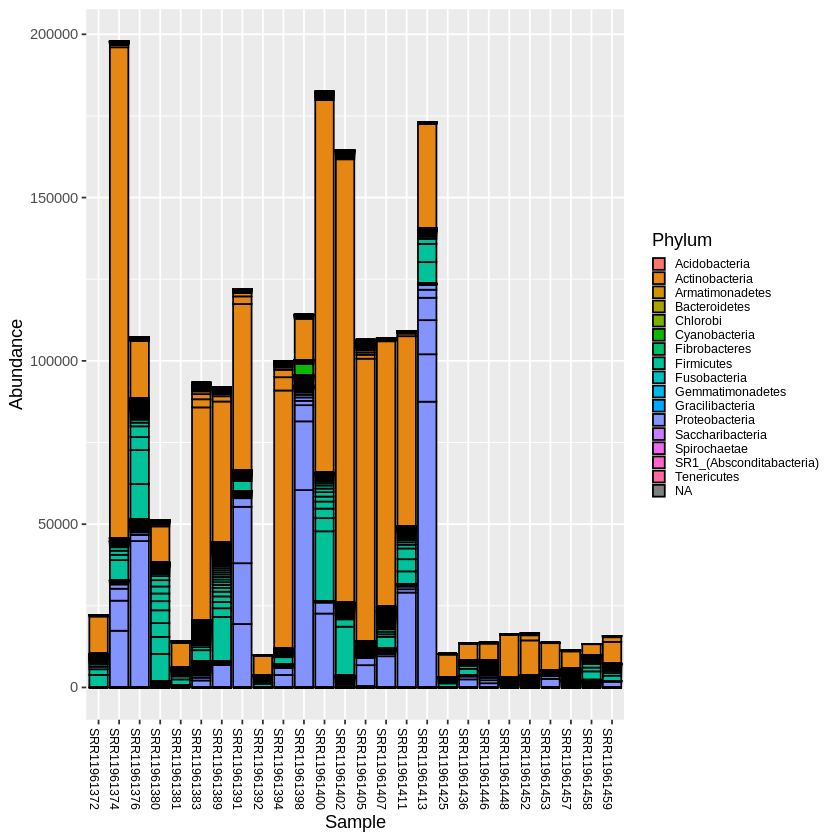

In [21]:
plot(plot1)

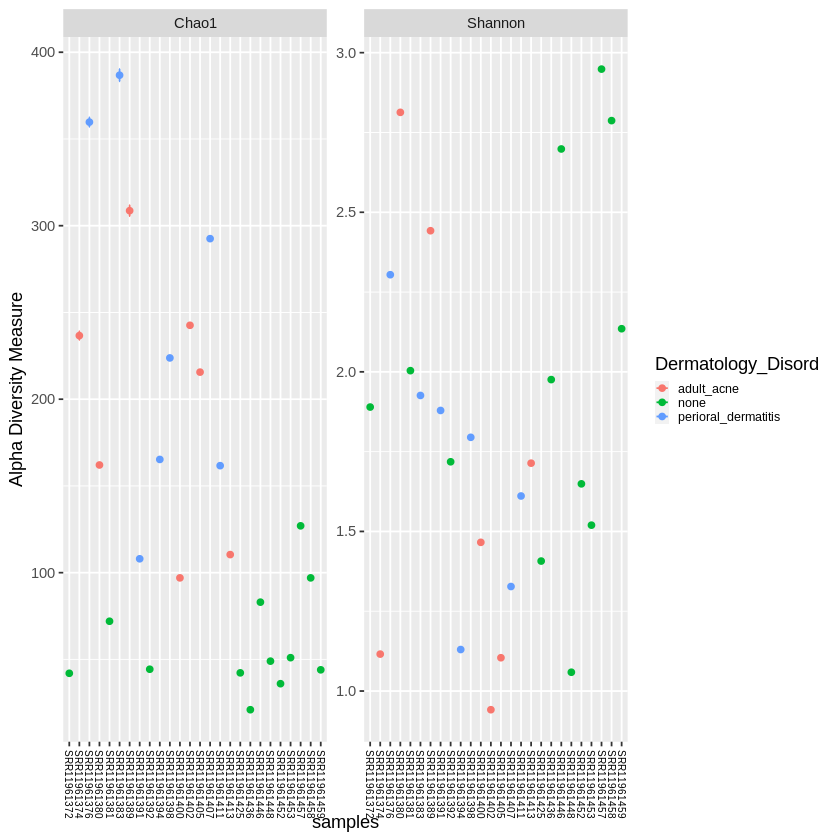

In [22]:
plot(plot2)

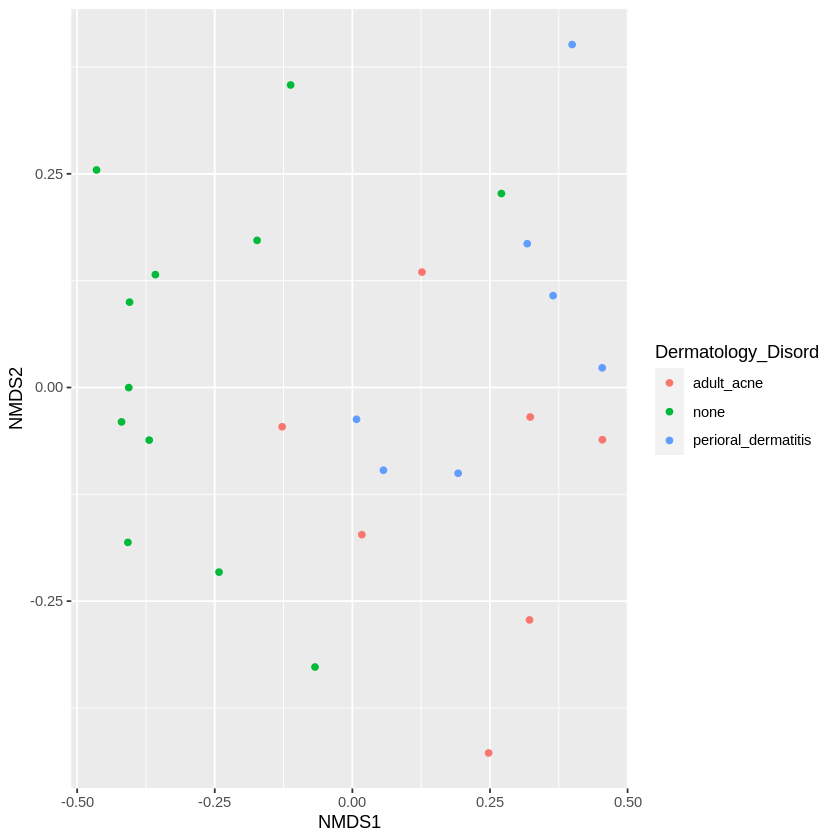

In [23]:
plot(plot3)

[1] 325

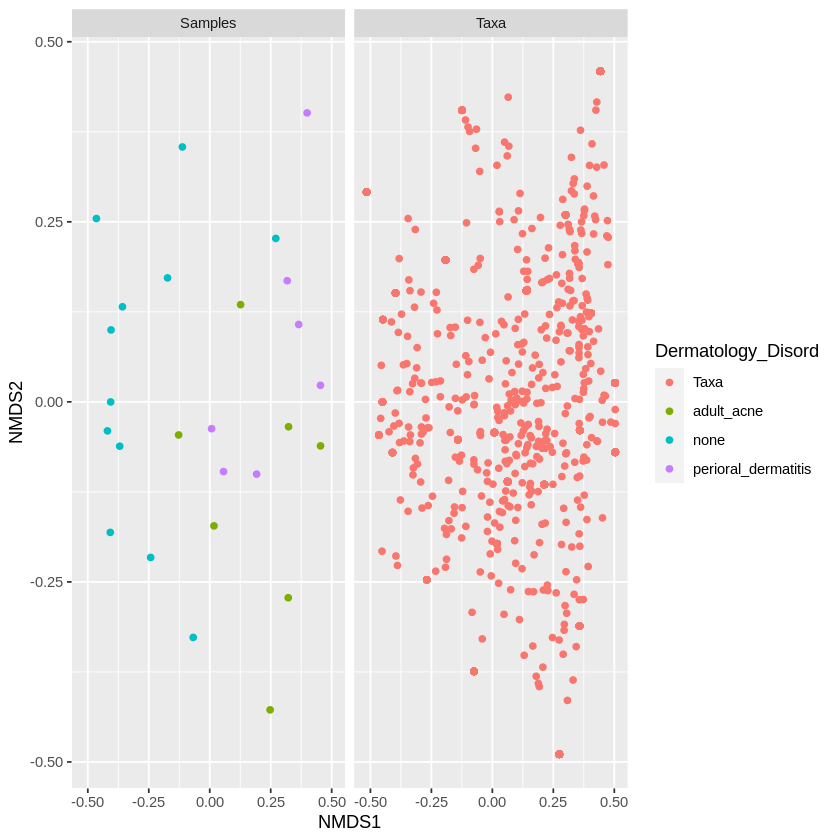

In [24]:
plot(plot4)
#print 
acne.ord$ndis